## Entrega 2 - Visualizaciones

#### Carga de librerias

In [54]:
import pandas as pd 
import numpy as np 
import os 
from os import listdir
from os.path import isfile, join 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#### Data Set 2 - Predicción de potencia generada por celdas solares
#### Descripción:
El archivo csv contiene 16 columnas. La descripción de cada columna es la siguiente:
- Day or Year: Día del año (0-365)
- Year: Año
- Mounth: Mes
- Day: Día
- First Hour of Period: Hora del día
- is day light: Si hay luz solar (Bool)
- Distance to solar noon: distancia al mediodia solar
- Average temperature (day): Temperatura promedio
- Average wind direction (day): Promedio de direccion del viento
- Average wind speed (day): Pomedio de velocidad del viento
- Sky Cover: Cobertura del cielo
- Visibility: Visibilidad
- Relative Humedity: Humedad Relativa
- Average Wind Speed Period: Promedio de velocidad del viento en ese periodo
- Average Barometric presure: Promedio de presion atmosferica
- Power Generated: Potencia generada


#### Carga de los datos

In [55]:
# Cargamos y presentamos los datos
df_DataSet2 = pd.read_csv('/workspaces/Coder/data/raw/Energia_Solar.csv')
df_DataSet2

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,True,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,True,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,243,2009,8,31,19,True,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [56]:
# Información del dataset
df_DataSet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   bool   
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-null   int64  
 11  Visibility       

El dataset no presenta nulos
* Posee un Valor Categorico (Is Day Light) Particularmente bool.
* Valores de Fecha como valores enteros, donde el año y Mes tambien pueden ser considerados categoricos y el día un valor discreto.
* El resto de los valores son datos climaticos que nos serviran para estimar la cantidad de potencia generada de las celdas solares:

** Variables discretas: 
Visibilidad (de 1 a 10 (intervalo 1))
Sky Cover (de 1 a 4 (intervalo 1))

** Variables continuas

In [57]:
# Renombramos las columnas para facilitar su manipulación
df_DataSet2 = df_DataSet2.rename(columns = {'Day of Year':'day_year', 'Year':'year', 'Month':'month', 'Day':'day', 
'First Hour of Period':'first_hour_period','Is Daylight':'is_daylight', 'Distance to Solar Noon':'dist_solar_noon',
'Average Temperature (Day)':'avg_temp_day', 'Average Wind Direction (Day)':'avg_wd_day', 'Average Wind Speed (Day)':'avg_ws_day', 
'Sky Cover':'sky_over', 'Visibility':'visibility', 'Relative Humidity':'rel_hum', 'Average Wind Speed (Period)':'avg_ws_period',      
'Average Barometric Pressure (Period)':'avg_pres_period', 'Power Generated':'power_gen'})

In [58]:
# Realizamos un describe para analizar las medida de tendencia central de los datos
df_DataSet2.iloc[:,6:16].describe().T

,count,mean,std,min,25%,50%,75%,max
dist_solar_noon,2920.0,0.503294,0.298024,0.050401,0.243714,0.478957,0.739528,1.141361
avg_temp_day,2920.0,58.468493,6.841200,42.000000,53.000000,59.000000,63.000000,78.000000
avg_wd_day,2920.0,24.953425,6.915178,1.000000,25.000000,27.000000,29.000000,36.000000
avg_ws_day,2920.0,10.096986,4.838185,1.100000,6.600000,10.000000,13.100000,26.600000
sky_over,2920.0,1.987671,1.411978,0.000000,1.000000,2.000000,3.000000,4.000000
visibility,2920.0,9.557705,1.383884,0.000000,10.000000,10.000000,10.000000,10.000000
rel_hum,2920.0,73.513699,15.077139,14.000000,65.000000,77.000000,84.000000,100.000000
avg_ws_period,2919.0,10.129154,7.261547,0.000000,5.000000,9.000000,15.000000,40.000000
avg_pres_period,2920.0,30.017760,0.142006,29.480000,29.920000,30.000000,30.110000,30.530000
power_gen,2920.0,6979.846233,10312.336413,0.000000,0.000000,404.000000,12723.500000,36580.000000


#### Análisis de la potencia generada

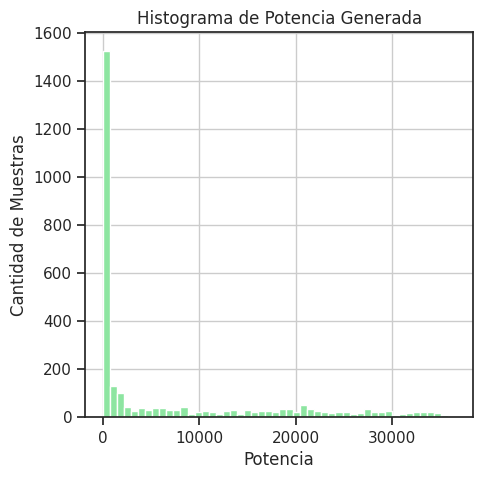

In [59]:
# estudiamos la distribución de la potencia generada (histograma)
df_DataSet2.loc[:,'power_gen'].hist(bins=50,figsize=(5,5), facecolor='g') 
plt.xlabel('Potencia')
plt.ylabel('Cantidad de Muestras')
plt.title('Histograma de Potencia Generada')
plt.grid(True)
plt.show()


Podemos observar que la mayoria de las muestras se encuentran con potencia cero o muy baja potencia generada

Text(0, 0.5, 'Potencia Generada')

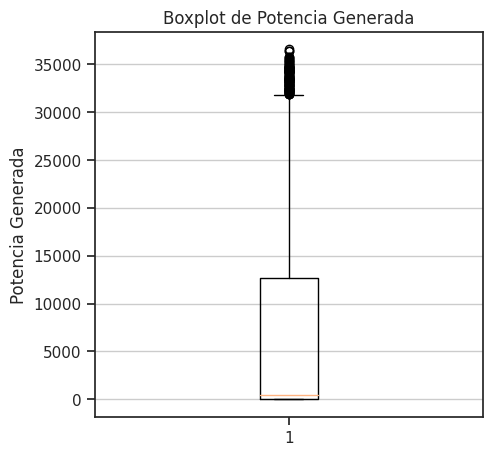

In [60]:
# estudiamos la distribución de la potencia generada según sus (histograma)
fig, ax = plt.subplots(figsize=(5, 5))
ax.boxplot(x=df_DataSet2["power_gen"],)
ax.yaxis.grid(True)
ax.set_title('Boxplot de Potencia Generada')
ax.set_ylabel('Potencia Generada')

Nuevamente, observamos que la media de la potencia generada se encuentra cercana al cero y los valores por encima de 32000 los considera outlayers. Estudiaremos que sucede con la potencia generada si no hay luz solar.

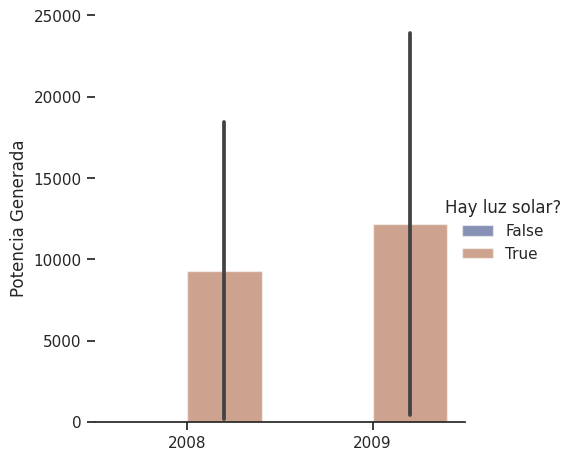

In [61]:
#Grafico de barras con la potencia generada si hay luz de día o no.
g = sns.catplot(
    data=df_DataSet2, kind="bar",
    x="year", y="power_gen", hue="is_daylight",
    errorbar="sd", palette="dark", alpha=.5, height=5
)
g.despine(left=True)
g.set_axis_labels("", "Potencia Generada")
g.legend.set_title("Hay luz solar?")

Como vemos en la gráfico de barras, la potencia generada cuando no hay luz solar es cero. Por lo tanto, para estimar la potencia generada 
se utilizarán las variables solamante en el caso de que haya luz solar. Es decir, filtraremos cada una de las variables por la variable categórica Is DayLight=True. De esta manera, podremos predecir la potencia generada durante las horas de luz solar, ya que durante las restantes, la potencia será cero. 

In [62]:
# nos quedamos con los datos correspondientes al período de luz solar
df_DataSet2_dia = df_DataSet2.query('is_daylight == True')
df_DataSet2_dia

,day_year,year,month,day,first_hour_period,is_daylight,dist_solar_noon,avg_temp_day,avg_wd_day,avg_ws_day,sky_over,visibility,rel_hum,avg_ws_period,avg_pres_period,power_gen
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
5,245,2008,9,1,16,True,0.296915,69,28,7.5,0,10.0,20,23.0,29.85,16280
6,245,2008,9,1,19,True,0.528278,69,28,7.5,0,10.0,36,15.0,29.83,515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,243,2009,8,31,7,True,0.396927,63,27,13.9,4,10.0,87,9.0,29.90,464
2915,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,True,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,True,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257


Al quitar los datos registrados durante las horas en donde no hay luz solar, conservamos 1805 muestras, por lo que seguimos teniendo datos suficientes para hacer le estimación de la potencoia generada durante el día.

Estudiamos la potencia generada durante las horas de luz solar:

<Figure size 500x500 with 0 Axes>

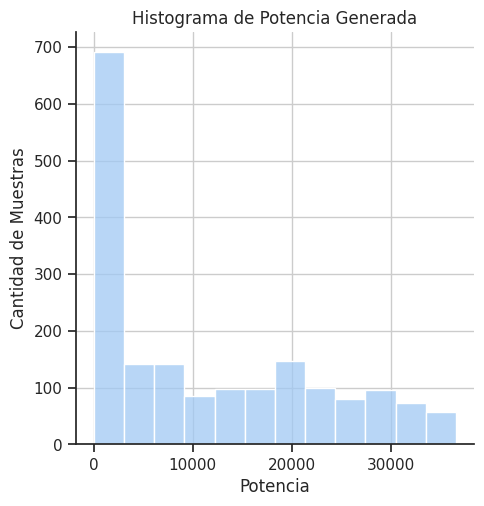

In [63]:
# estudiamos la distribución de la potencia generada 

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(5,5)) #defino el tamaño del grafico
sns.displot(x = 'power_gen', data = df_DataSet2_dia)
plt.xlabel('Potencia')
plt.ylabel('Cantidad de Muestras')
plt.title('Histograma de Potencia Generada')
plt.grid(True)
plt.show()

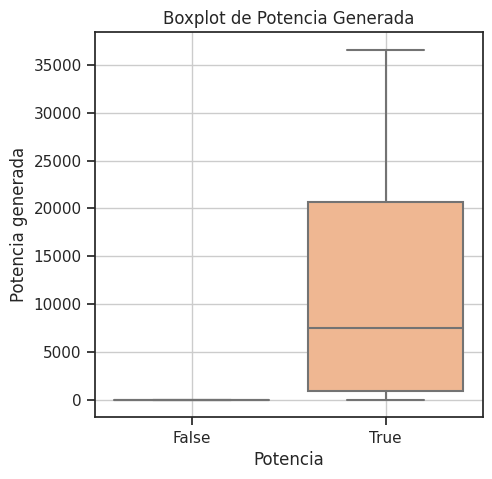

In [64]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(5,5)) #defino el tamaño del grafico
sns.boxplot(y = 'power_gen', x = 'is_daylight', data = df_DataSet2)
plt.xlabel('Potencia')
plt.ylabel('Potencia generada')
plt.title('Boxplot de Potencia Generada')
plt.grid(True)
plt.show()

Como observamos, la media de potencia subio de manera considerable y ya no considera como outlayers los valores por encima de 32000.

In [65]:
df_DataSet2_avg_dia_2008 = df_DataSet2_dia.groupby('day_year').mean().query('year == 2008')
df_DataSet2_avg_dia_2009 = df_DataSet2_dia.groupby('day_year').mean().query('year == 2009')
avg_pot_dia_2008 = df_DataSet2_avg_dia_2008[['power_gen']]
df_DataSet2_dia_2008 = df_DataSet2_dia.query('year == 2008')
t_2008 = df_DataSet2_dia_2008['day_year'].unique()
avg_pot_dia_2009 = df_DataSet2_avg_dia_2009[['power_gen']]
df_DataSet2_dia_2009 = df_DataSet2_dia.query('year == 2009')
t_2009 = df_DataSet2_dia_2009['day_year'].unique()

df_DataSet2_dia.groupby('day_year').mean().groupby('month').mean()

pd.DataFrame(df_DataSet2_dia['day_year'].unique())
xxx = (df_DataSet2_dia['day_year'].unique())
xxx
df_DataSet2_dia.groupby('day_year').mean()

,year,month,day,first_hour_period,is_daylight,dist_solar_noon,avg_temp_day,avg_wd_day,avg_ws_day,sky_over,visibility,rel_hum,avg_ws_period,avg_pres_period,power_gen
day_year,,,,,,,,,,,,,,,
1,2009.0,1.0,1.0,11.5,1.0,0.311958,47.0,3.0,3.8,3.50,5.5000,88.50,5.00,30.1550,8320.50
2,2009.0,1.0,2.0,11.5,1.0,0.311419,51.0,25.0,10.3,3.50,5.5000,88.25,11.50,29.9275,2299.25
3,2009.0,1.0,3.0,11.5,1.0,0.310881,44.0,30.0,5.2,2.25,10.0000,62.75,5.75,30.0575,9844.00
4,2009.0,1.0,4.0,11.5,1.0,0.310881,42.0,27.0,2.4,2.00,10.0000,65.00,1.50,30.1700,9827.25
5,2009.0,1.0,5.0,11.5,1.0,0.310881,46.0,4.0,4.2,4.00,5.7500,81.25,1.25,30.1850,2002.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2008.0,12.0,27.0,11.5,1.0,0.313589,45.0,12.0,1.3,2.50,10.0000,77.50,2.00,30.3800,5546.75
363,2008.0,12.0,28.0,11.5,1.0,0.313043,51.0,10.0,2.4,2.75,10.0000,80.50,2.00,30.3425,8107.75
364,2008.0,12.0,29.0,11.5,1.0,0.313043,51.0,30.0,3.2,2.75,7.7500,85.25,2.00,30.2625,4729.00


Veremos la potencia generada mes a mes

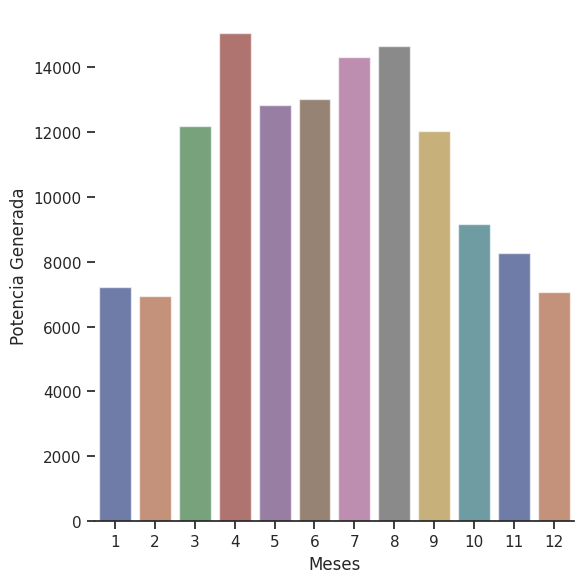

In [66]:
# Barplot
g = sns.catplot(
    data=df_DataSet2_dia.groupby('day_year').mean().groupby('month').mean(), kind="bar",
    x=[1,2,3,4,5,6,7,8,9,10,11,12], y="power_gen",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Meses", "Potencia Generada")
#g.legend.set_title("Hay luz solar?")

#xxx = (df_DataSet2_dia['day_year'].unique())
#mmm = (df_DataSet2_dia['month'].unique())
# Barplot
#sns.barplot(x="Year", y="Relative Humidity", hue="Is Daylight", data=df_DataSet2)
#g = sns.catplot(
#    data=df_DataSet2_dia.groupby('day_year').mean(), kind="bar",
#    x=xxx, y="power_gen", hue ="month",
#    errorbar="sd", palette="dark", alpha=.6, height=6
#)
#g.despine(left=True)
#g.set_axis_labels("", "Potencia Generada")
#g.legend.set_title("Meses")


In [67]:
#for i in range(len(df_DataSet2_dia)):
#    print(df_DataSet2_dia.loc[i, "month"], df_DataSet2_dia.loc[i, "power_gen"])
#juan = empleados.loc[empleados['Nombre'] == 'Juan']
for index, row in df_DataSet2_dia.iterrows():
    if df_DataSet2_dia.loc[df_DataSet2_dia['month'].isin((1,1))]
        print(row["month"], row["power_gen"])

SyntaxError: expected ':' (1171432780.py, line 5)

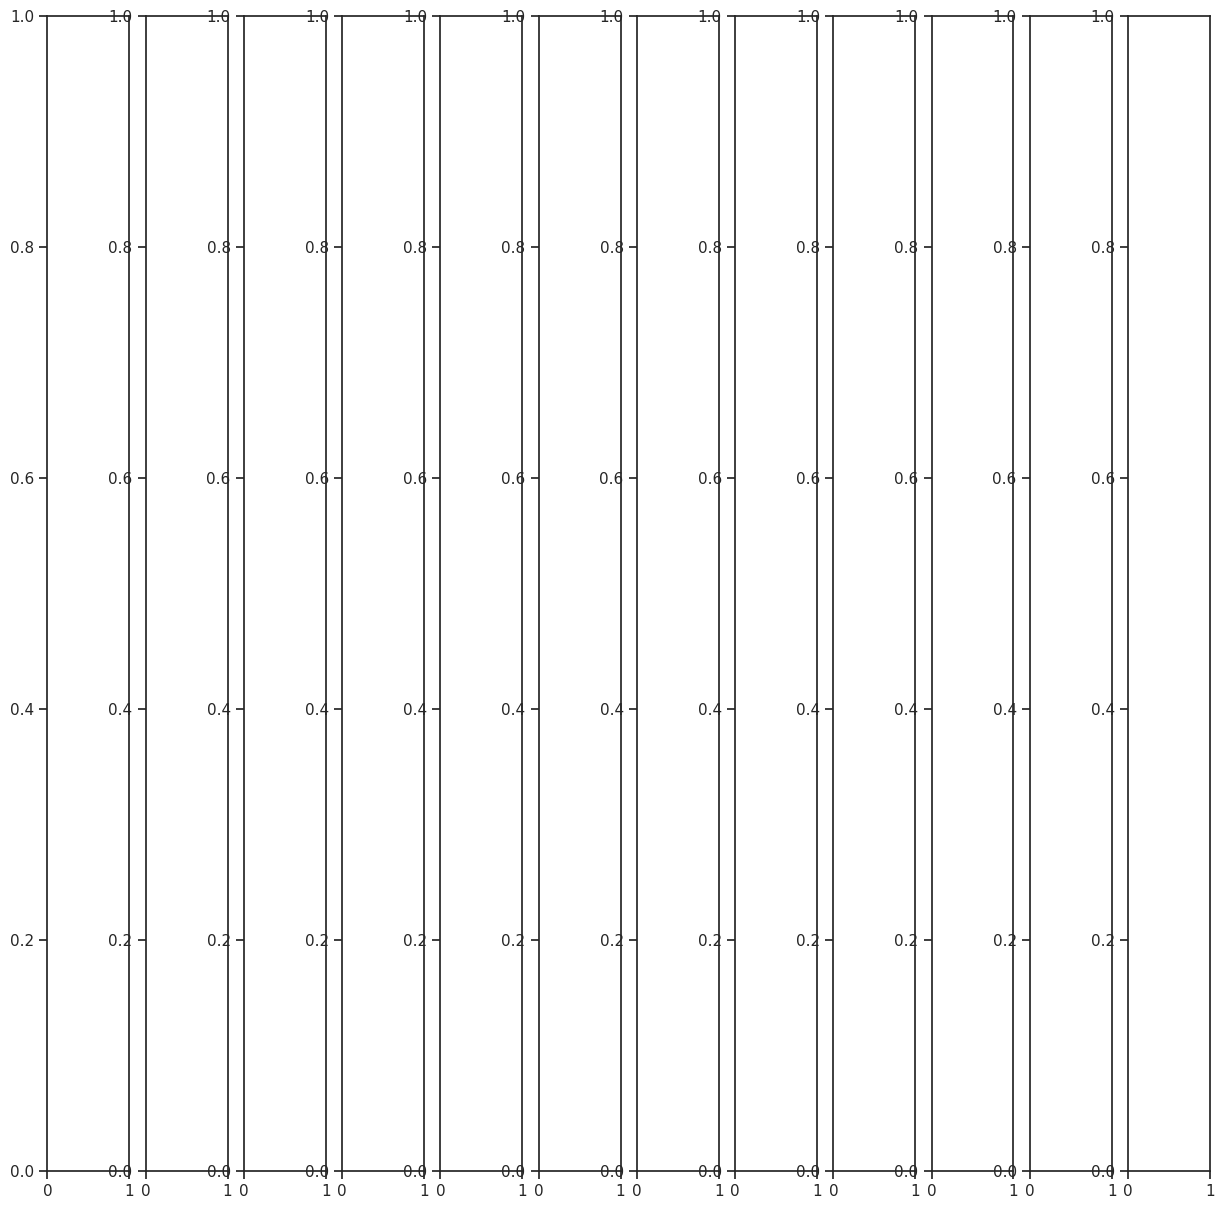

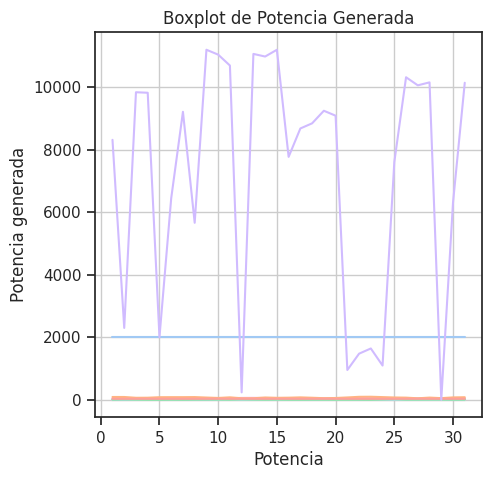

In [81]:
x1 = df_DataSet2_dia.loc[df_DataSet2_dia['month'].isin((1,1))].groupby('day_year').mean()
y1 = x1['day']
x2 = df_DataSet2_dia.loc[df_DataSet2_dia['month'].isin((2,2))].groupby('day_year').mean()
y2 = x2['day']
x3 = df_DataSet2_dia.loc[df_DataSet2_dia['month'].isin((3,3))].groupby('day_year').mean()
y3 = x3['day']
x4 = df_DataSet2_dia.loc[df_DataSet2_dia['month'].isin((4,4))].groupby('day_year').mean()
y4 = x4['day']
x5 = df_DataSet2_dia.loc[df_DataSet2_dia['month'].isin((5,5))].groupby('day_year').mean()
y5 = x5['day']
x6 = df_DataSet2_dia.loc[df_DataSet2_dia['month'].isin((6,6))].groupby('day_year').mean()
y6 = x6['day']
x7 = df_DataSet2_dia.loc[df_DataSet2_dia['month'].isin((7,7))].groupby('day_year').mean()
y7 = x7['day']
x8 = df_DataSet2_dia.loc[df_DataSet2_dia['month'].isin((8,8))].groupby('day_year').mean()
y8 = x8['day']
x9 = df_DataSet2_dia.loc[df_DataSet2_dia['month'].isin((9,9))].groupby('day_year').mean()
y9 = x9['day']
x10 = df_DataSet2_dia.loc[df_DataSet2_dia['month'].isin((10,10))].groupby('day_year').mean()
y10 = x10['day']
x11 = df_DataSet2_dia.loc[df_DataSet2_dia['month'].isin((11,11))].groupby('day_year').mean()
y11 = x11['day']
x12 = df_DataSet2_dia.loc[df_DataSet2_dia['month'].isin((12,12))].groupby('day_year').mean()
y12 = x12['day']
fig, axs = plt.subplots(1, 12, figsize=(15,15))

plt.figure(figsize=(5,15)) #defino el tamaño del grafico
plt.plot(y1, x1 , label='Enero')
plt.xlabel('Potencia')
plt.ylabel('Potencia generada')
plt.title('Boxplot de Potencia Generada')
plt.grid(True)
plt.show()



#axs[0, 0].plot(y1, x1 , label='Enero')
#axs[1, 2].plot(y2, x2 , label='Febrero')
#axs[1, 3].plot(y3, x3 , label='Marzo')
#axs[1, 4].plot(y4, x4 , label='Abril')
#axs[1, 5].plot(y5, x5 , label='Mayo')
#axs[1, 6].plot(y6, x6 , label='Junio')
#axs[1, 7].plot(y7, x7 , label='Julio')
#axs[1, 8].plot(y8, x8 , label='Agosto')
#axs[1, 9].plot(y9, x9 , label='Septiembre')
#axs[1, 10].plot(y10, x10 , label='Octubre')
#axs[1, 11].plot(y11, x11 , label='Noviembre')
#axs[1, 12].plot(y12, x12 , label='Diciembre')
#axs.xlabel('Potencia')
#axs.ylabel('Potencia generada')
#axs.title('Boxplot de Potencia Generada')
#axs.grid(True)
#axs.show()






In [72]:


x1 = df_DataSet2_dia.loc[df_DataSet2_dia['month'].isin((1,1))].groupby('day_year').mean()
y1 = x1.index
x1['day']







day_year
1      1.0
2      2.0
3      3.0
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.0
17    17.0
18    18.0
19    19.0
20    20.0
21    21.0
22    22.0
23    23.0
24    24.0
25    25.0
26    26.0
27    27.0
28    28.0
29    29.0
30    30.0
31    31.0
Name: day, dtype: float64

In [ ]:
g = sns.catplot(
    data=df_DataSet2_dia.groupby('month').mean(), kind="bar",
    x=[1], y="power_gen",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Meses", "Potencia Generada")

ValueError: Grouper for '1' not 1-dimensional

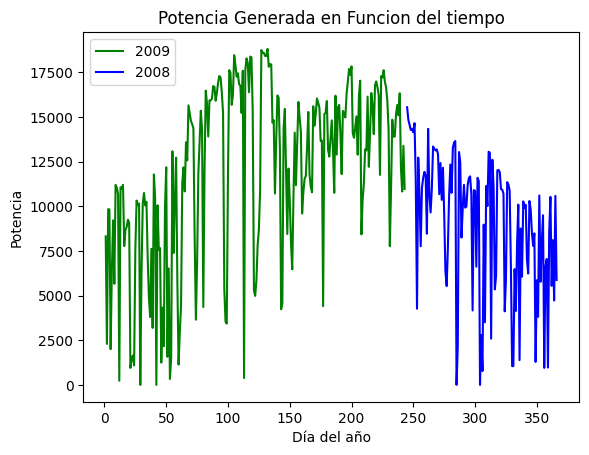

In [ ]:
# Data for plotting
t = df_DataSet2_dia.index
s = df_DataSet2_dia['power_gen']
# separo el dataset en 2008 y 2009
#df_DataSet2_dia_2008 = df_DataSet2_dia.query('year == 2008')
#df_DataSet2_dia_2009 = df_DataSet2_dia.query('year == 2009')
#t_2008 = df_DataSet2_dia_2008.index
#t_2009 = df_DataSet2_dia_2009.index
s_2008 = avg_pot_dia_2008
s_2009 = avg_pot_dia_2009


plt.plot(t_2009, s_2009, "g", label = "2009")
plt.plot(t_2008, s_2008, "b", label = "2008")
plt.legend(loc = "upper left")
plt.title("Potencia Generada en Funcion del tiempo")
plt.xlabel("Día del año")
plt.ylabel("Potencia")
plt.show()

#fig, ax = plt.subplots()
#ax.plot(t_2008, s_2008, t_2009, s_2009) 
#ax.set(xlabel='Muestras temporales (Intervalos de 4 horas', ylabel='Potencia', title='Potencia Generada en Funcion del tiempo')
#ax.grid()

plt.show()

/tmp/ipykernel_4794/1062237671.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.relplot(


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

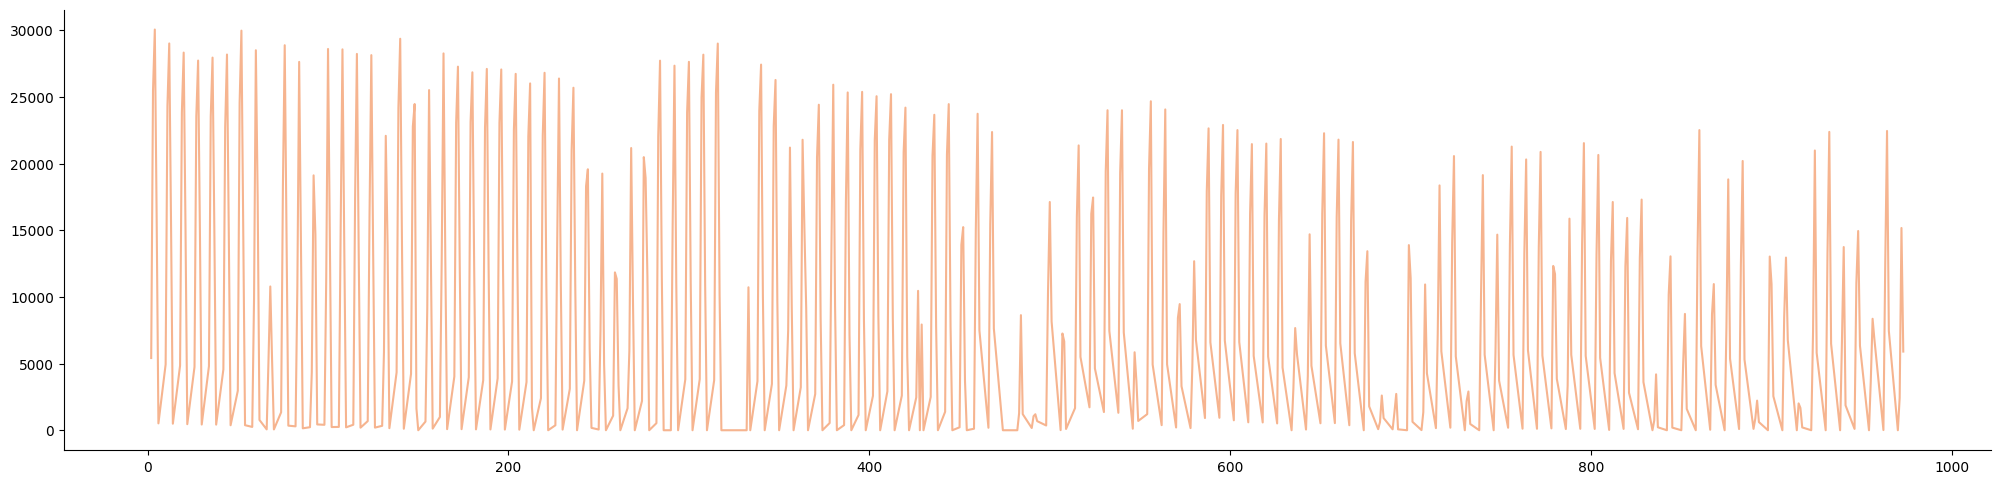

In [ ]:
# Potencia generada en funcion del tiempo
#sns.barplot(x="Year", y="Relative Humidity", hue="Is Daylight", data=df_DataSet2)
#g = sns.relplot(
#    data=df_DataSet2, kind="bar",
#    x="index", y="power_gen", hue="is_daylight",
#    errorbar="sd", palette="dark", alpha=.6, height=6
#)
#g.despine(left=True)
#g.set_axis_labels("", "Potencia Generada")
#g.legend.set_title("Hay luz solar?")
# Define the palette as a list to specify exact values


palette = sns.color_palette("rocket_r")
sns.relplot(
    data=df_DataSet2_dia,x=df_DataSet2_dia.index, y="power_gen",
    hue="year", kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=4, facet_kws=dict(sharex=False),
)
# size="choice",

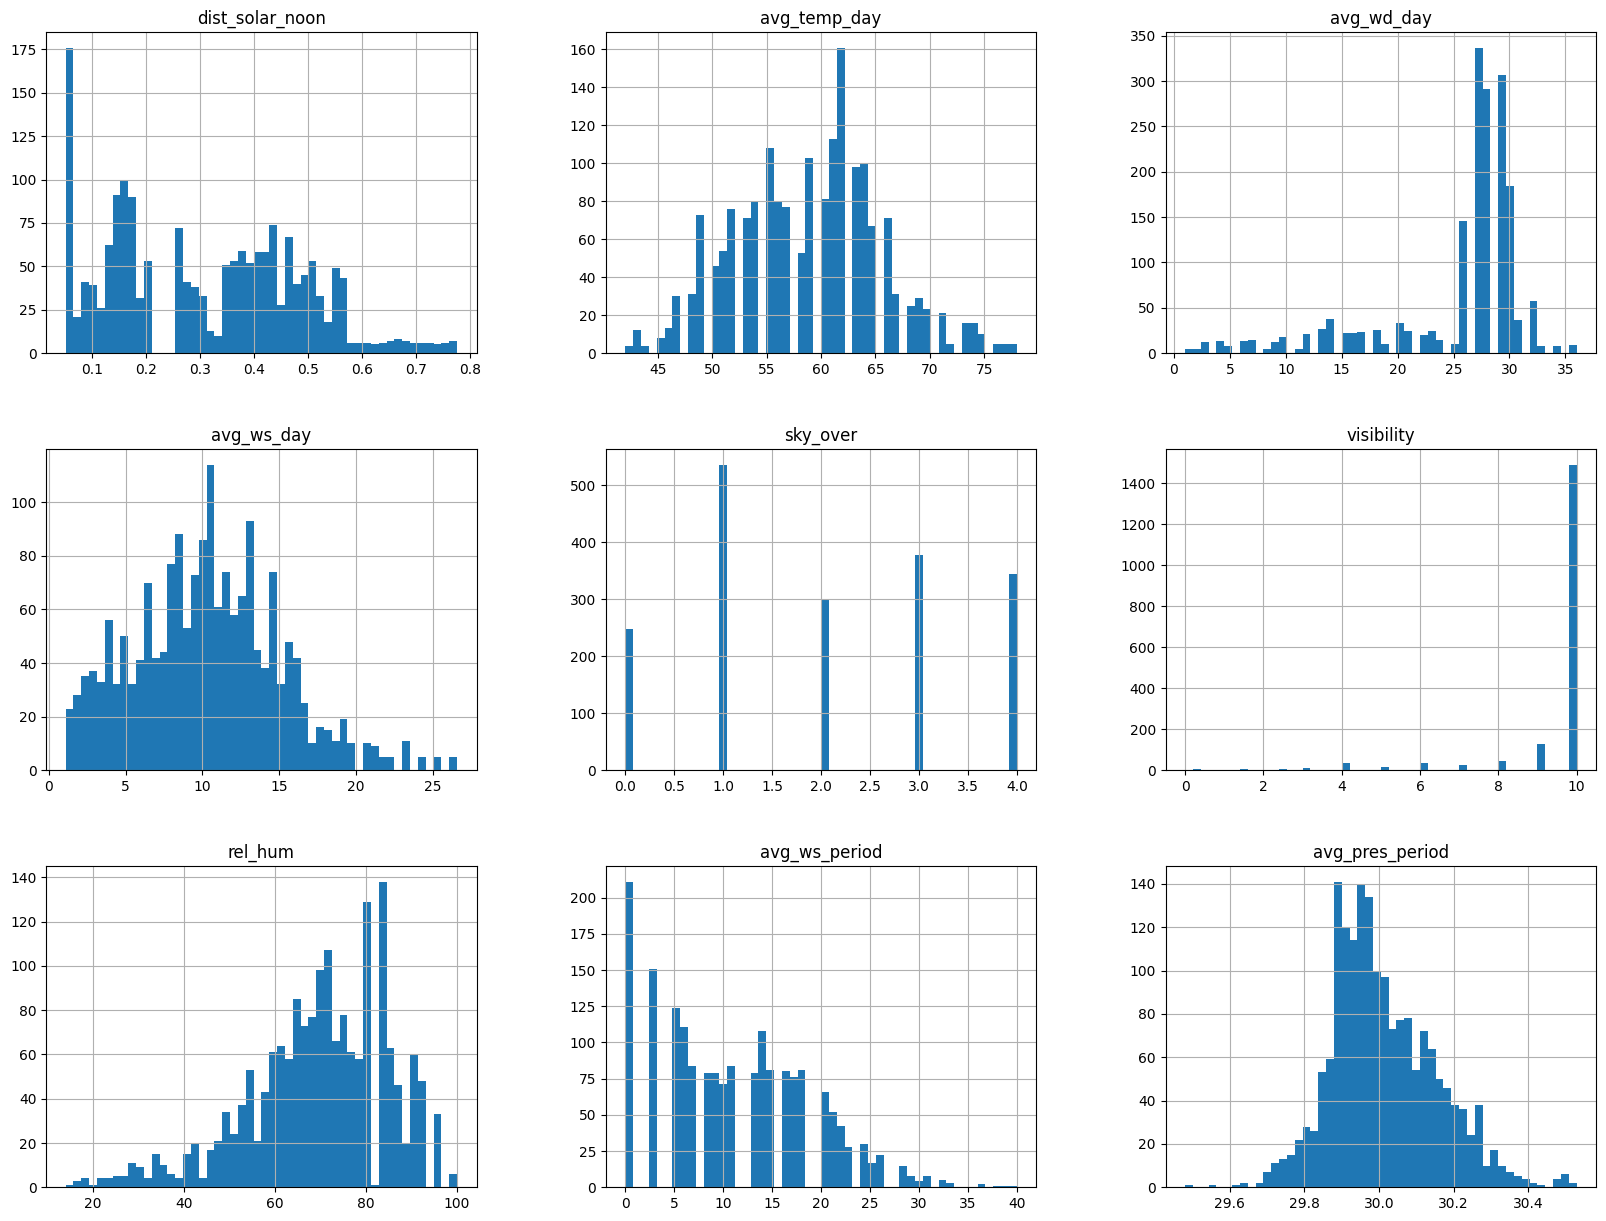

In [ ]:
# estudiamos la distribución de cada una de las variables climáticas (variables continuas) que nos podrían ser útiles (a priori) para 
# estimar la potencia generada
df_DataSet2_dia.iloc[:,6:15].hist(bins=50,figsize=(20,15)) 
plt.show()

<AxesSubplot: >

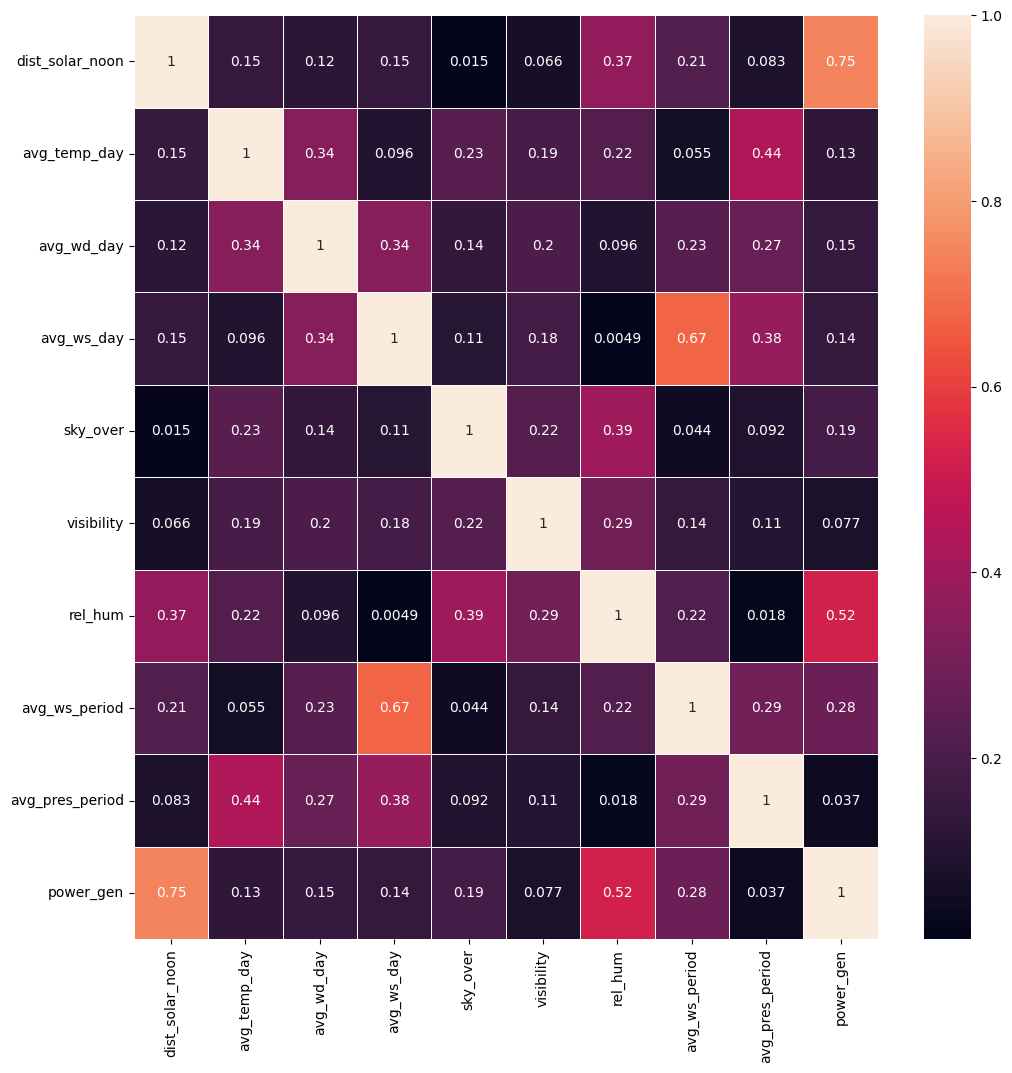

In [ ]:
# Vemos la correlación de los datos que tenemos con la potencia
fig1, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_DataSet2.iloc[:,6:16].corr().abs(), annot=True, linewidths=.5, ax=ax)


Podemos observar que la humedad relativa (0.52) y la distancia al mediodía solar (0.75) son las variables más correlacionadas con la potencia.
Entre ellas no se ve una fuerte correlación (0.37) 

In [ ]:
#df_Dataset_anio = df_DataSet2.groupby('Year').mean()
#fig, ax = plt.subplots(figsize=(12, 3))  
#ax.plot(df_DataSet2.index, df_DataSet2['Relative Humidity'], hue='Year', label='Precipitaciones de enero')
#ax.plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
#ax.axhline(maximo_enero, color='red', linestyle='--', alpha=0.5,    linewidth=3, label='Máxima de enero')
#ax.axhline(maximo_febrero, color='red', linestyle=':', alpha=0.5, linewidth=3, label='Máxima de febrero')
#ax.legend()